In [2]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex1 import *

/tmp/ipykernel_37/3895727876.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
2025-10-09 05:36:48.930257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759988209.171862      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759988209.238321      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import pandas as pd

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine.shape # (rows, columns)

(1599, 12)

In [6]:
input_shape = [red_wine.shape[1] - 1]

In [7]:
input_shape

[11]

In [8]:
import torch
import torch.nn as nn

input_size = input_shape[-1] 
output_size = 1 # Corresponds to units=1

model = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=output_size)
)

In [10]:
linear_layer = model[0]

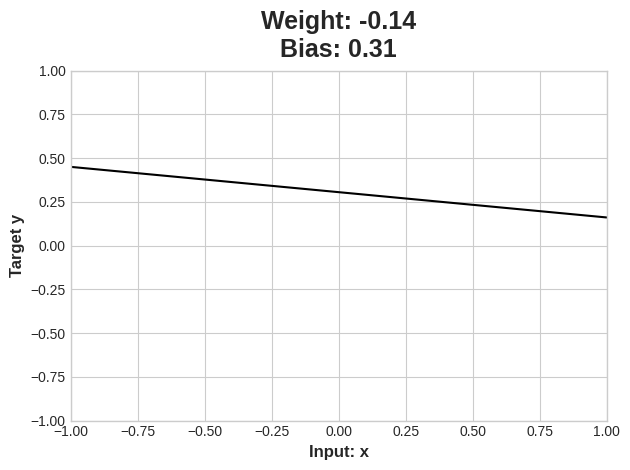

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. MODEL DEFINITION (Keras Sequential -> PyTorch nn.Sequential)
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1) 
)
linear_layer = model[0] # Get the nn.Linear object

# 2. DATA GENERATION (tf.linspace -> torch.linspace)
x = torch.linspace(-1.0, 1.0, 100).view(-1, 1).float() 

# 3. PREDICTION (model.predict -> model(x))
with torch.no_grad():
    y = model(x)

# 4. GET WEIGHTS AND BIAS (model.weights -> linear_layer.weight/bias.data)
w = linear_layer.weight.data.item() 
b = linear_layer.bias.data.item() 

# 5. PLOTTING (Same Matplotlib logic)
plt.figure(dpi=100)

# Convert PyTorch tensors (x and y) to numpy arrays for plotting
plt.plot(x.numpy(), y.numpy(), 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
plt.title(f"Weight: {w:0.2f}\nBias: {b:0.2f}") # Using f-string for clarity
plt.show()